In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_auc_score
import xgboost as xgf

In [2]:
os.chdir(r"C:\Users\Stifmeister\Downloads\pima-indians-diabetes-database")
print(os.getcwd())
print(os.listdir(os.getcwd()))

C:\Users\Stifmeister\Downloads\pima-indians-diabetes-database
['diabetes.csv']


In [3]:
df=pd.read_csv('diabetes.csv')

In [4]:
print(df.shape)

(768, 9)


In [7]:
import pandas_profiling as pp

In [7]:
#pp.ProfileReport(df)

In [5]:
d=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
d.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1


In [6]:
#Replace NaN to mean value to explore dataset

d['Glucose'].fillna(df['Glucose'].median(),inplace=True)
d['BloodPressure'].fillna(df['BloodPressure'].median(),inplace=True)
#df['Pregnancies'].fillna(df['Pregnancies'].median(),inplace=True)
d['SkinThickness'].fillna(df['SkinThickness'].median(),inplace=True)
d['Insulin'].fillna(df['Insulin'].median(),inplace=True)
d['BMI'].fillna(df['BMI'].median(),inplace=True)

In [10]:
#pp.ProfileReport(d)

In [7]:
#Dropping out BloodPressure and SkinThickness,due to low correlation to the output(due to less unique count)
X = np.array(d.drop(['SkinThickness','BloodPressure'], 1))
Y=np.array(df['Outcome'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.15,random_state=0)
print(X_train.shape)
print(X_test.shape)

(652, 3)
(116, 3)


In [9]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#This is an inbalanced classification problem with almost 2:1 ratio and may lead to overfitting.
#As the data sample is pretty sparse,undersampling is not an option.
#Applying Oversampling Techniques.

In [11]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [12]:
print(X_train_res.shape)

(844, 3)


In [13]:
print("No. of positives before resampling:",sum(y_train==1))
print("No. of negatives before resampling:",sum(y_train==0))
print("No. of positives after resampling:",sum(y_train_res == 1))
print("No. of negatives after resampling:",sum(y_train_res == 0))
#Balancing the unbalanced data


No. of positives before resampling: 230
No. of negatives before resampling: 422
No. of positives after resampling: 422
No. of negatives after resampling: 422


In [14]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train_res=sc.transform(X_train_res)

In [15]:
#Imbalanced Data
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(X_train, y_train.ravel()) 
  
predictions = lr.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 
#accuracies = {}
#acc = lr.score(X_test,y_test)*100
#accuracies['Logistic Regression'] = acc
#print("Test Accuracy {:.2f}%".format(acc))
lr_roc_u=roc_auc_score(y_test,predictions)
print("ROC AUC SCORE:",lr_roc_u)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.84      0.88      0.86        78
           1       0.74      0.66      0.69        38

   micro avg       0.81      0.81      0.81       116
   macro avg       0.79      0.77      0.78       116
weighted avg       0.81      0.81      0.81       116

ROC AUC SCORE: 0.771255060728745


In [16]:
#Oversampled Data
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 
#accuracies1 = {}
#acc1 = lr.score(X_test,y_test)*100
#accuracies1['Logistic Regression'] = acc
#print("Test Accuracy {:.2f}%".format(acc)) 
lr_roc=roc_auc_score(y_test, predictions)
print("ROC AUC SCORE:",lr_roc)


              precision    recall  f1-score   support

           0       0.83      0.76      0.79        78
           1       0.58      0.68      0.63        38

   micro avg       0.73      0.73      0.73       116
   macro avg       0.70      0.72      0.71       116
weighted avg       0.75      0.73      0.74       116

ROC AUC SCORE: 0.7203103913630229


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#Therefore,as we see in the above two analysis -after using SMOTE though the test accureacy remained same,but the positive recall value increased in the oversampled model.
#Therefore,we would most likely fit our upcoming models on the oversampled data.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)

#print("{} NN Score: {:.2f}%".format(2, knn.score(X_test, y_test)*100))
KNN_roc=roc_auc_score(y_test, prediction)
print("ROC AUC SCORE:",KNN_roc)

ROC AUC SCORE: 0.6595816464237517


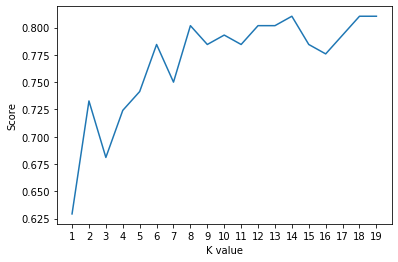

Maximum KNN Score is 81.03%
at n= 14


In [18]:
# tuning  find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
n=scoreList.index(max(scoreList))
acc = max(scoreList)*100
#accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))
print("at n=",n+1)

In [ ]:
#SVM

In [42]:
from sklearn.svm import SVC

In [56]:
svm = SVC(random_state = 1,kernel='linear',C=1)
svm.fit(X_train, y_train)
prediction = svm.predict(X_test)
acc = svm.score(X_test,y_test)*100
#accuracies['SVM'] = acc
#print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))
svm_roc=roc_auc_score(y_test,prediction)
print("ROC AUC SCORE:",svm_roc)


ROC AUC SCORE: 0.7580971659919028


In [36]:
#Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt',max_depth=5)
# Fit on training data

model.fit(X_train, y_train)
#acc=print(model.score(X_test,y_test)*100)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [71]:
rf_predictions = model.predict(X_test)
# Probabilities for each class
rf_probs = model.predict_proba(X_test)[:, 1]

In [82]:
from sklearn.metrics import roc_auc_score
# Calculate roc auc
random_roc_value = roc_auc_score(y_test, rf_probs)
print("The roc_auc value is:",random_roc_value)

The roc_auc value is: 0.8301282051282051


In [73]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [75]:
est = RandomForestClassifier(n_jobs=-1)

rf_p_dist={'max_depth':[3,5,10,None],

              'n_estimators':[10,100,200,300,400,500],

              'max_features':randint(1,3),

               'criterion':['gini','entropy'],

               'bootstrap':[True,False],

               'min_samples_leaf':randint(1,4),

              }

def hypertuning_rscv(est, p_distr, nbr_iter,X,y):

    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,

                                  n_jobs=-1, n_iter=nbr_iter, cv=9)

    #CV = Cross-Validation ( here using Stratified KFold CV)

    rdmsearch.fit(X,y)

    ht_params = rdmsearch.best_params_

    ht_score = rdmsearch.best_score_

    return ht_params, ht_score


rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 40, X_train, y_train)
#claasifier=RandomForestClassifier(n_jobs=-1, n_estimators=300,bootstrap= True,criterion='entropy',max_depth=3,max_features=2,min_samples_leaf= 3)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [76]:
print(rf_parameters)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3, 'n_estimators': 10}


In [77]:
print(rf_ht_score)

0.754601226993865


In [85]:
from sklearn.ensemble import RandomForestClassifier
# Create the model with 100 trees
model1 = RandomForestClassifier(n_estimators=10, 
                               bootstrap = True,
                               max_features = 2,max_depth=3,criterion='gini',min_samples_leaf=3)
# Fit on training data

model1.fit(X_train, y_train)
#acc=print(model.score(X_test,y_test)*100)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [86]:
rf_predictions1 = model1.predict(X_test)
# Probabilities for each class
rf_probs1 = model1.predict_proba(X_test)[:, 1]

In [87]:
from sklearn.metrics import roc_auc_score
# Calculate roc auc
random_roc_value1 = roc_auc_score(y_test, rf_probs1)
print("The roc_auc value is:",random_roc_value1)

The roc_auc value is: 0.8345141700404858


In [46]:
#Though the roc score seems to be same for both,the max depth and no. of nodes are less in tuned model.
#Therefore,we would prefer using second model for the purpose of computing efficiency
#Hence the random forest seems to have the best sepratablity

In [88]:
roc_auc=[]
roc_auc.append(lr_roc_u)
roc_auc.append(lr_roc)
roc_auc.append(KNN_roc)
roc_auc.append(svm_roc)
roc_auc.append(random_roc_value)
#print(roc_auc)
algo=[]
algo.append("Logistic Regression unsampled")
algo.append("logistic Regression oversampled")
algo.append("KNN")
algo.append("Linear SVM")
algo.append("Random_Forest")
#print(algo)

[0.771255060728745, 0.7203103913630229, 0.6595816464237517, 0.7580971659919028, 0.8301282051282051]
['Logistic Regression unsampled', 'logistic Regression oversampled', 'KNN', 'Linear SVM', 'Random_Forest']


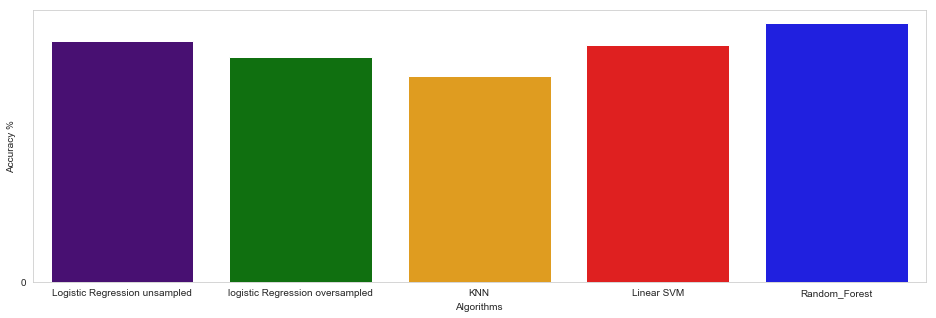

In [90]:
colors = ["indigo", "green", "orange", "red","blue"]
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(algo), y=list(roc_auc), palette=colors)
plt.show()

In [64]:
#We would be selecting Random Forest,due to its higher sepratablity

In [65]:
#Confusion Matrices

In [94]:
# Predicted values
y_head_rf = model1.predict(X_test)

In [95]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test,y_head_rf)

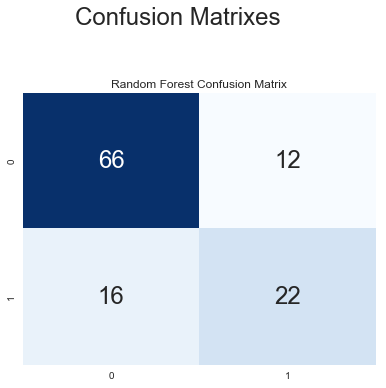

In [96]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)
plt.subplot(2,3,2)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.show()